# Explore

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p

import statsmodels.api as sm

## Sale Items

In [2]:
item_df = pd.read_csv('sale_items.csv')

In [4]:
item_df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


/Users/liz/codeup-data-science/time-series-exercises/prepare.py:25: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df.sale_date = df.sale_date.astype('datetime64')


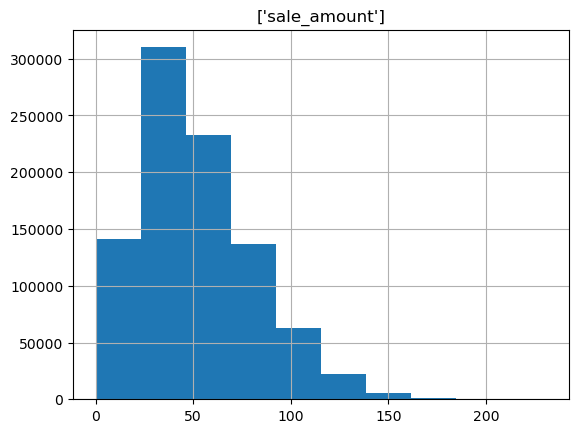

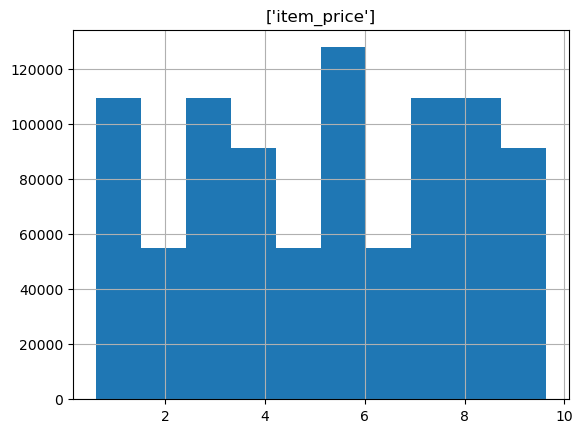

In [6]:
item_df = p.prep_sales_data(item_df)

In [7]:
item_df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-02,1,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2,9.24
2013-01-03,1,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3,11.76
2013-01-04,1,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,4,10.92
2013-01-05,1,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,5,8.40


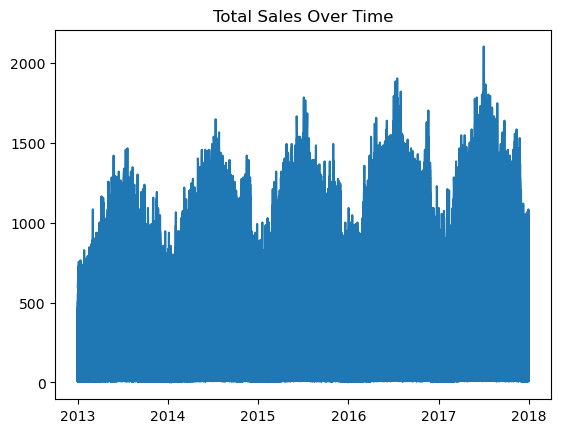

In [9]:
plt.plot(item_df.sales_total)
plt.title('Total Sales Over Time')
plt.show()

In [11]:
train = item_df.loc[:'2016']
test = item_df.loc['2017']

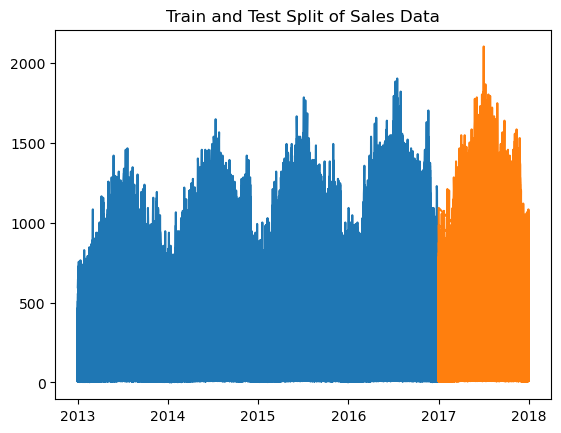

In [13]:
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.title('Train and Test Split of Sales Data')
plt.show()

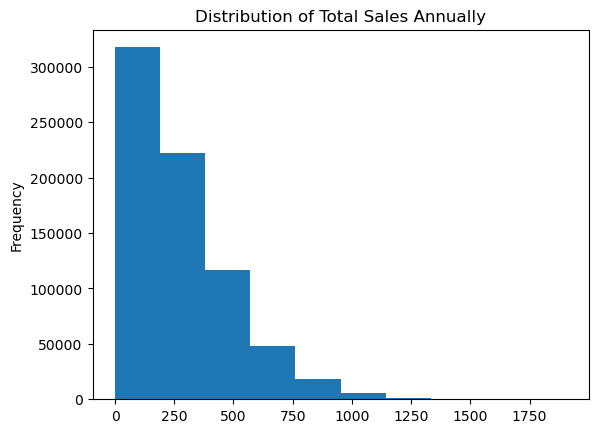

In [15]:
train.sales_total.plot.hist()
plt.title('Distribution of Total Sales Annually')
plt.show()

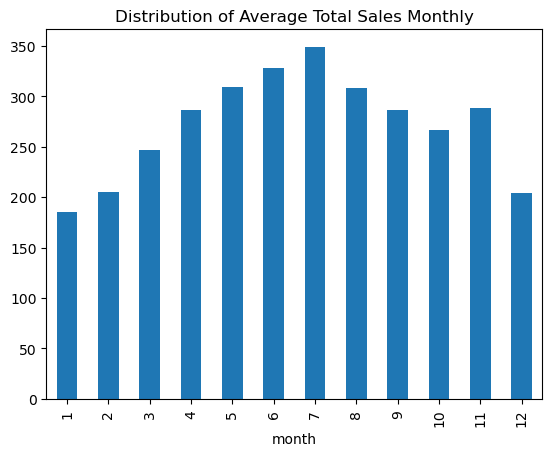

In [24]:
train.groupby('month').sales_total.mean().plot.bar()
plt.title('Distribution of Average Total Sales Monthly')
plt.show()

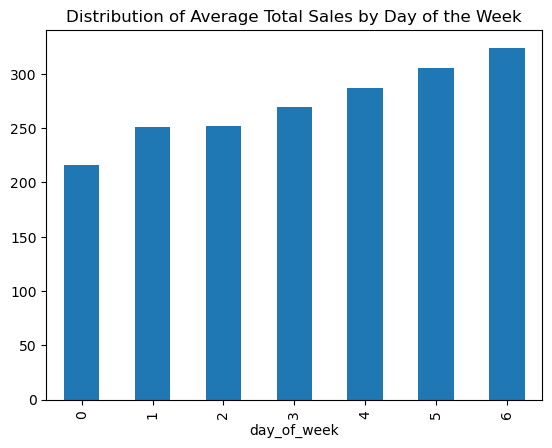

In [23]:
train.groupby('day_of_week').sales_total.mean().plot.bar()
plt.title('Distribution of Average Total Sales by Day of the Week')
plt.show()

In [25]:
y = train.sales_total

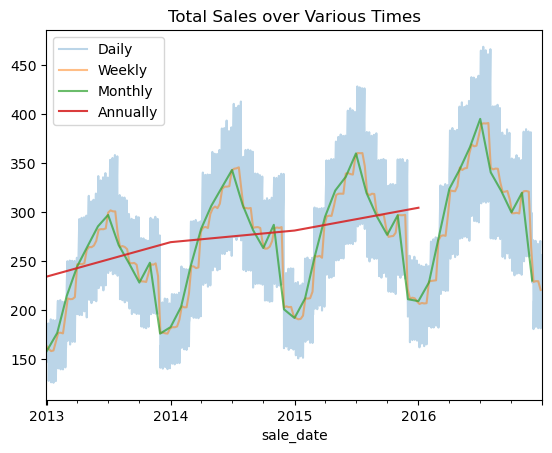

In [33]:
y.resample('D').mean().plot(alpha= 0.3, label='Daily')
y.resample('W').mean().plot(alpha= 0.5, label='Weekly')
y.resample('M').mean().plot(alpha= 0.7, label= 'Monthly')
y.resample('Y').mean().plot(alpha= 0.9, label = 'Annually')

plt.title('Total Sales over Various Times')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Difference of Average Total Sales per Week')

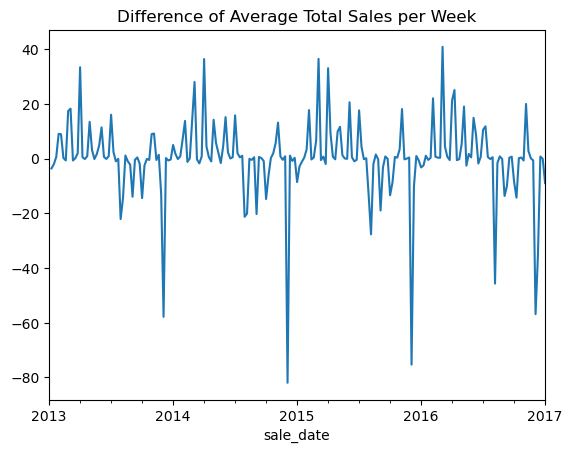

In [35]:
y.resample('W').mean().diff().plot()
plt.title('Difference of Average Total Sales per Week')

Text(0.5, 1.0, 'Difference of Average Total Sales per Month')

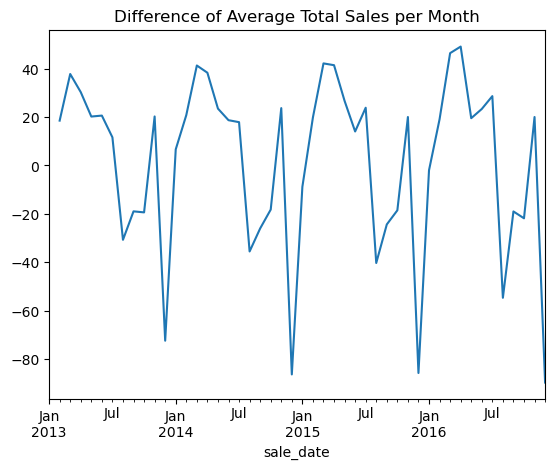

In [37]:
y.resample('M').mean().diff().plot()
plt.title('Difference of Average Total Sales per Month')

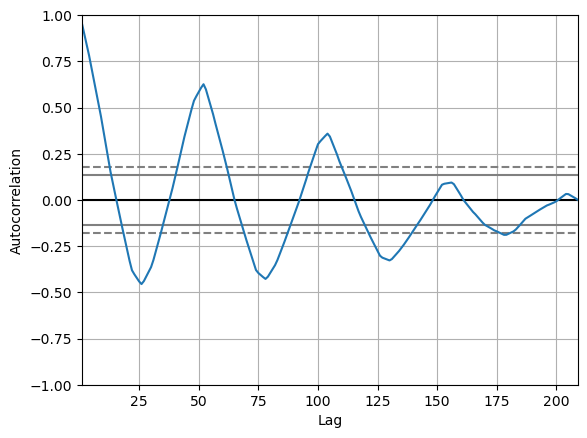

In [39]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 52)'>

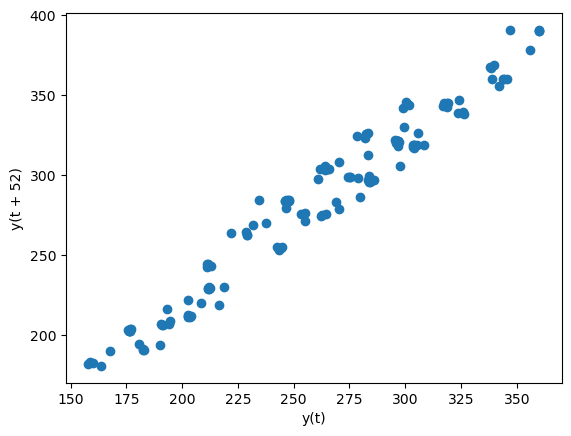

In [41]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)

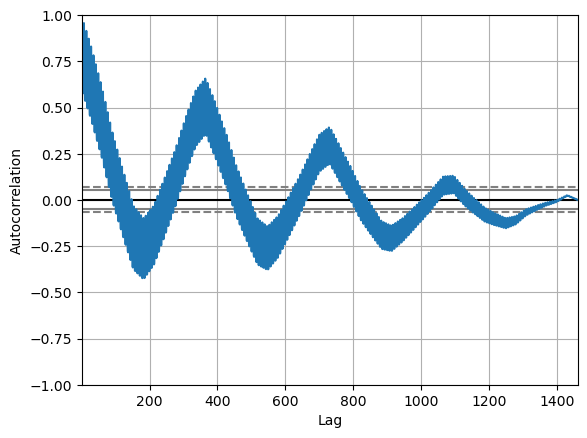

In [45]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('D').mean())
plt.show()

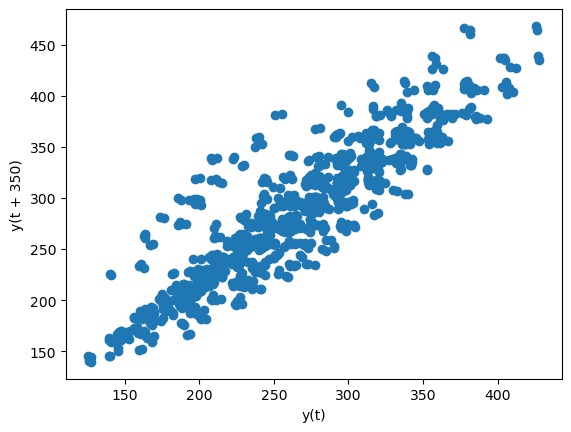

In [47]:
pd.plotting.lag_plot(train.sales_total.resample('D').mean(), lag=350)
plt.show()

In [49]:
y = train.sales_total.resample('W').mean()

In [51]:
result = sm.tsa.seasonal_decompose(y)

In [52]:
decomp = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

In [53]:
decomp['trend_centered'] = decomp.trend - decomp.trend.mean()

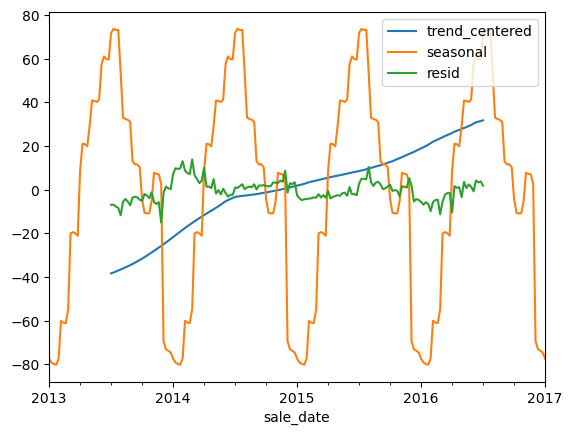

In [57]:
decomp[['trend_centered', 'seasonal', 'resid']].plot()
plt.show()

In [121]:
y = train.sales_total

## OPSD

In [91]:
german_df = pd.read_csv('opsd_germany_daily.csv')

In [92]:
german_df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [93]:
german_df = german_df.drop(columns='Unnamed: 0')

In [94]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [95]:
german_df.columns = german_df.columns.str.lower()

In [96]:
german_df.columns = german_df.columns.str.replace('+', '_', regex=True)

In [97]:
german_df.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [98]:
german_df.set_index('date', inplace=True)

In [99]:
german_df.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
